## Objective: Clean data prior to add'l viz. and modeling

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_raw = pd.read_csv("data_tables/train_tube_numcomp_numspecs_comptype_tubeform.csv")

In [3]:
df_raw.columns

Index(['Unnamed: 0', 'tube_assembly_id', 'supplier', 'quote_date',
       'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity',
       'cost', 'material_id', 'diameter', 'wall', 'length', 'num_bends',
       'bend_radius', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end_a',
       'end_x', 'num_boss', 'num_bracket', 'other', 'total_comp',
       'revised_qty', 'spec_count', 'OTHER', 'CP-024', 'CP-026', 'CP-028',
       'CP-014', 'CP-018', 'CP-001', 'CP-008', 'CP-009', 'CP-002', 'CP-010',
       'CP-021', 'CP-011', 'CP-015', 'CP-027', 'CP-003', 'CP-004', 'CP-005',
       'CP-019', 'CP-025', 'CP-006', 'CP-016', 'CP-020', 'CP-012', 'CP-022',
       'CP-007', 'CP-017', 'CP-023', 'CP-029', 'end_a_form', 'end_x_form'],
      dtype='object')

In [4]:
df_raw[df_raw["revised_qty"] == 100]["cost"].mean()

4.242058962980914

In [5]:
df = df_raw.copy()

In [6]:
del df["Unnamed: 0"]

In [7]:
df.shape

(29970, 57)

## material_id

In [8]:
df["material_id"].isnull().any()

True

In [9]:
df = df.dropna(subset = ["material_id"])

In [10]:
df.shape

(29746, 57)

In [11]:
df_matl = pd.get_dummies(df["material_id"], prefix = "matl")

In [12]:
df_matl.shape

(29746, 17)

In [13]:
df = pd.concat([df, df_matl], axis = 1)

In [14]:
df.shape

(29746, 74)

## end_a, end_x

In [15]:
df_ea1x = pd.get_dummies(df["end_a_1x"], prefix = "ea_1x")
df_ea2x = pd.get_dummies(df["end_a_2x"], prefix = "ea_2x")
df_ex1x = pd.get_dummies(df["end_x_1x"], prefix = "ex_1x")
df_ex2x = pd.get_dummies(df["end_x_1x"], prefix = "ex_2x")
df_ea = pd.get_dummies(df["end_a"], prefix = "ea")
df_ex = pd.get_dummies(df["end_x"], prefix = "ex")

In [16]:
df = pd.concat([df, df_ea1x, df_ea2x, df_ex1x, df_ex2x, df_ea, df_ex], axis = 1)

In [17]:
df.shape

(29746, 131)

## rename "other" columns

In [18]:
df = df.rename(columns = {"other": "num_other", "OTHER": "CP-OTHER"})

## end_a_form, end_x_form deal with "0.0"

In [19]:
df["end_a_form"] = ["Y" if item == "Yes" else "N" for item in df["end_a_form"]]
df["end_x_form"] = ["Y" if item == "Yes" else "N" for item in df["end_x_form"]]

In [20]:
df_ea_form = pd.get_dummies(df["end_a_form"], prefix = "ea_form")
df_ex_form = pd.get_dummies(df["end_x_form"], prefix = "ex_form")

In [21]:
df = pd.concat([df, df_ea_form, df_ex_form], axis = 1)

In [22]:
df.shape

(29746, 135)

## check range for all ints and floats

In [23]:
for col in df.columns:
    if (df[col].dtype) == float or type(col) == int:
        print(col, df[col].min(), df[col].max())

cost 0.503552689416 1000.0
diameter 3.18 203.2
wall 0.71 7.9
length 0.0 1333.0
bend_radius 0.0 9999.0
total_comp 0.0 13.0
CP-OTHER 0.0 11.0
CP-024 0.0 4.0
CP-026 0.0 2.0
CP-028 0.0 2.0
CP-014 0.0 2.0
CP-018 0.0 5.0
CP-001 0.0 2.0
CP-008 0.0 2.0
CP-009 0.0 2.0
CP-002 0.0 2.0
CP-010 0.0 1.0
CP-021 0.0 1.0
CP-011 0.0 2.0
CP-015 0.0 2.0
CP-027 0.0 3.0
CP-003 0.0 2.0
CP-004 0.0 1.0
CP-005 0.0 1.0
CP-019 0.0 4.0
CP-025 0.0 4.0
CP-006 0.0 2.0
CP-016 0.0 1.0
CP-020 0.0 2.0
CP-012 0.0 2.0
CP-022 0.0 2.0
CP-007 0.0 2.0
CP-017 0.0 1.0
CP-023 0.0 1.0
CP-029 0.0 1.0
matl_SP-0008 0.0 1.0
matl_SP-0019 0.0 1.0
matl_SP-0028 0.0 1.0
matl_SP-0029 0.0 1.0
matl_SP-0030 0.0 1.0
matl_SP-0031 0.0 1.0
matl_SP-0032 0.0 1.0
matl_SP-0033 0.0 1.0
matl_SP-0034 0.0 1.0
matl_SP-0035 0.0 1.0
matl_SP-0036 0.0 1.0
matl_SP-0037 0.0 1.0
matl_SP-0038 0.0 1.0
matl_SP-0039 0.0 1.0
matl_SP-0041 0.0 1.0
matl_SP-0046 0.0 1.0
matl_SP-0048 0.0 1.0
ea_1x_N 0.0 1.0
ea_1x_Y 0.0 1.0
ea_2x_N 0.0 1.0
ea_2x_Y 0.0 1.0
ex_1x_N 0.0 1.0
ex_

In [83]:
df.to_csv("data_tables/cleaned_final.csv")

In [95]:
temp = pd.pivot_table(data = df, values = ["supplier", "quote_date", "revised_qty"], index = "tube_assembly_id", aggfunc = lambda x: x.unique())

Exception: Must produce aggregated value

In [93]:
temp.plot(kind = "hist")

In [88]:
from matplotlib import pyplot as plt

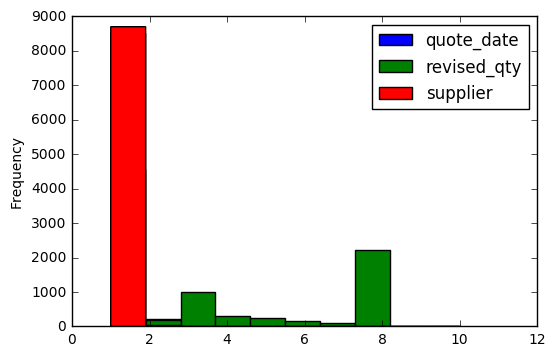

In [94]:
plt.show()

In [15]:
df.dtypes

tube_assembly_id       object
supplier               object
quote_date             object
annual_usage            int64
min_order_quantity      int64
bracket_pricing        object
quantity                int64
cost                  float64
material_id            object
diameter              float64
wall                  float64
length                float64
num_bends               int64
bend_radius           float64
end_a_1x               object
end_a_2x               object
end_x_1x               object
end_x_2x               object
end_a                  object
end_x                  object
num_boss                int64
num_bracket             int64
other                   int64
total_comp            float64
revised_qty             int64
spec_count              int64
OTHER                 float64
CP-024                float64
CP-026                float64
CP-028                float64
CP-014                float64
CP-018                float64
CP-001                float64
CP-008    

## 2/4/17

In [2]:
df = pd.read_csv("data_tables/cleaned_final.csv")

In [3]:
cond1 = df["length"] == 0
cond2 = df["bend_radius"] == 9999
cond3 = df["total_comp"] == 0

In [4]:
df[cond2].shape

(12, 136)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df[df["length"] == 0].shape

(26, 136)

## clean bend_radius

In [7]:
df["bend_radius"] = [i if i != 9999 else 0 for i in df["bend_radius"]]

## clean length

In [8]:
df.shape

(29746, 136)

In [9]:
df = df[df["length"] != 0]

In [10]:
df.shape

(29720, 136)

In [11]:
df["length"].dtype

dtype('float64')

In [75]:
df.to_csv("data_tables/cleaned_final2.csv")

In [27]:
from sklearn.cross_validation import train_test_split

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
del df["Unnamed: 0"]

In [13]:
# Prep data for modeling
#del df["tube_assembly_id"]
del df["supplier"]
del df["quote_date"]
del df["min_order_quantity"]
del df["quantity"]
del df["bracket_pricing"]
del df["material_id"]
del df["end_a"]
del df["end_a_1x"]
del df["end_a_2x"]
del df["end_x"]
del df["end_x_1x"]
del df["end_x_2x"]

In [21]:
df["id"] = [int(i.split("-")[1]) for i in df["tube_assembly_id"]]

In [22]:
del df["tube_assembly_id"]

In [23]:
y = df["cost"]
del df["cost"]

In [24]:
df.shape

(29720, 122)

In [25]:
y.shape

(29720,)

In [16]:
df.to_csv("data_tables/X_train_id.csv")
y.to_csv("data_tables/y_train_full.csv")

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3)

In [29]:
ydf_test = pd.DataFrame(y_test)
ydf_train = pd.DataFrame(y_train)

In [30]:
X_train.to_csv("data_tables/X_train_id.csv")
X_test.to_csv("data_tables/X_test_id.csv")
ydf_train.to_csv("data_tables/y_train_id.csv")
ydf_test.to_csv("data_tables/y_test_id.csv")

In [85]:
df.dtypes

annual_usage      int64
diameter        float64
wall            float64
length          float64
num_bends         int64
bend_radius     float64
num_boss          int64
num_bracket       int64
num_other         int64
total_comp      float64
revised_qty       int64
spec_count        int64
CP-OTHER        float64
CP-024          float64
CP-026          float64
CP-028          float64
CP-014          float64
CP-018          float64
CP-001          float64
CP-008          float64
CP-009          float64
CP-002          float64
CP-010          float64
CP-021          float64
CP-011          float64
CP-015          float64
CP-027          float64
CP-003          float64
CP-004          float64
CP-005          float64
                 ...   
ea_EF-025       float64
ea_NONE         float64
ex_9999         float64
ex_EF-001       float64
ex_EF-002       float64
ex_EF-003       float64
ex_EF-004       float64
ex_EF-005       float64
ex_EF-006       float64
ex_EF-007       float64
ex_EF-008       